###### Problem Statement

- Predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

- Dataset:- gas_turbines.csv

In [2]:
#Read datset
data = pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


###### EDA

In [3]:
data.shape

(15039, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
#Checking null entries
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
#Checking Duplicates.
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


- Visualization

In [8]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

<AxesSubplot:>

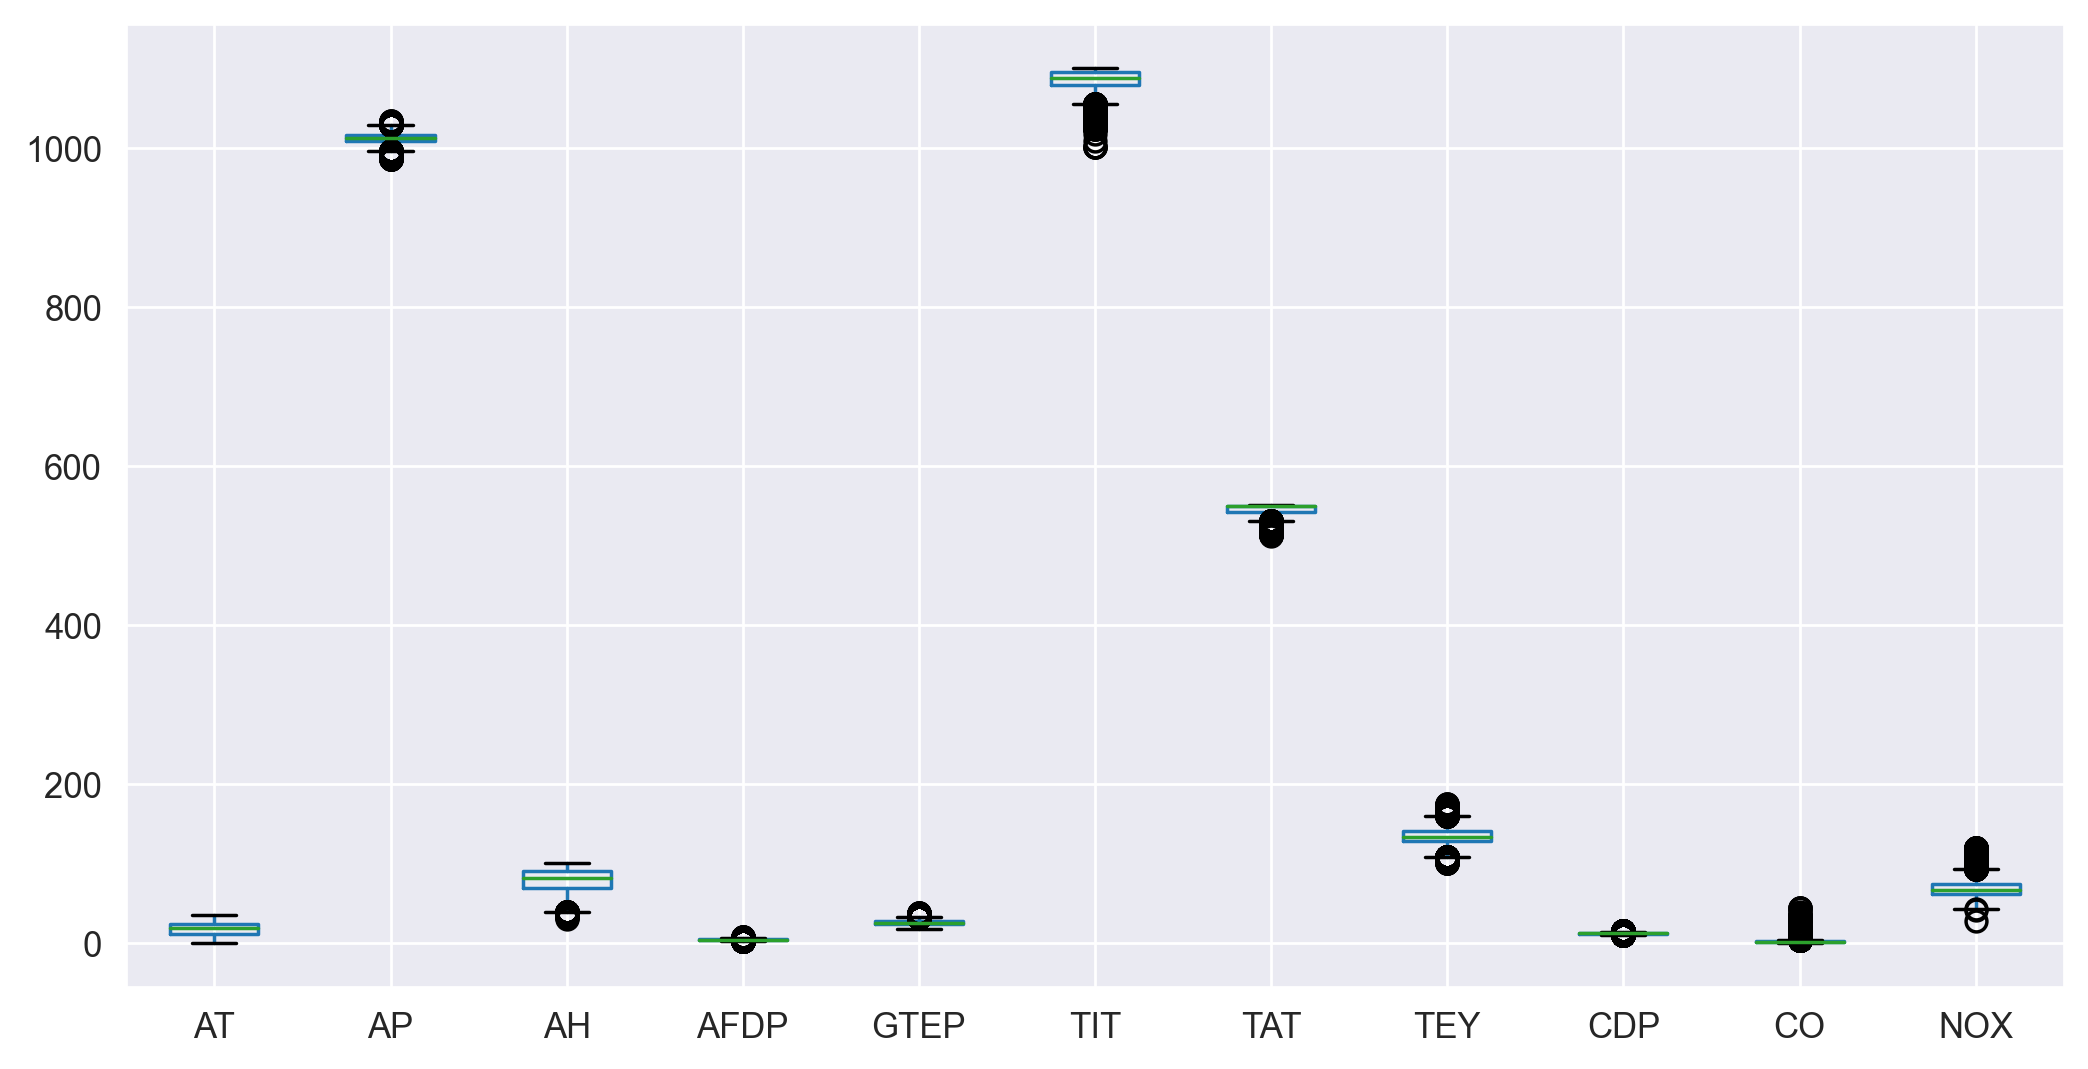

In [9]:
#Boxplot
data.boxplot()

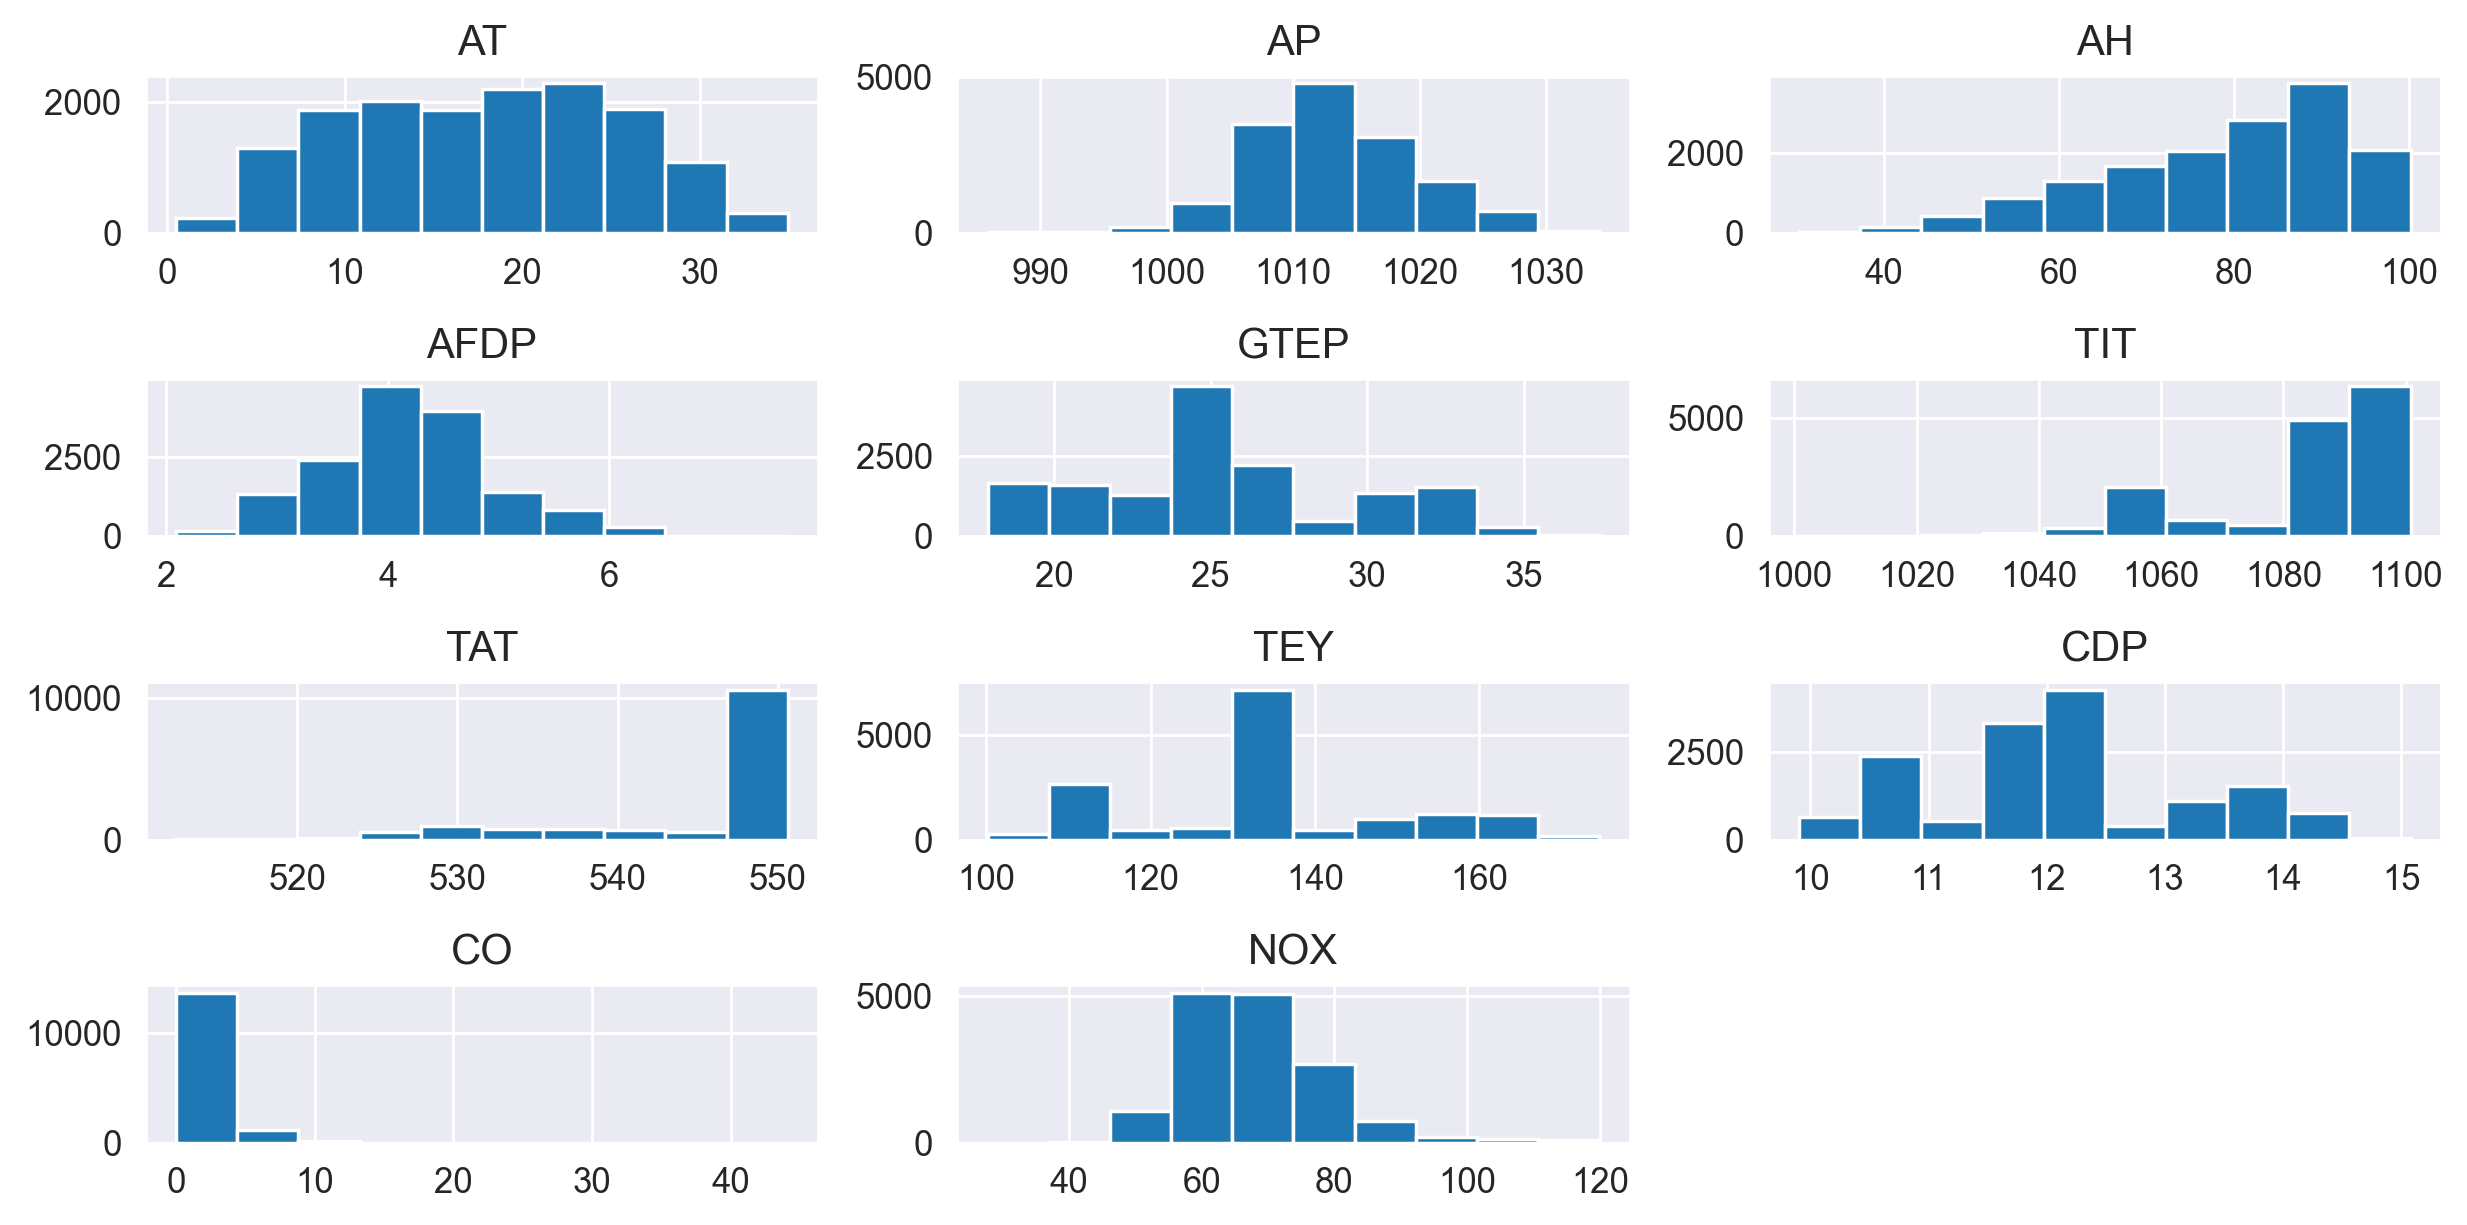

In [10]:
#Histogram
data.hist()
plt.tight_layout();

<AxesSubplot:>

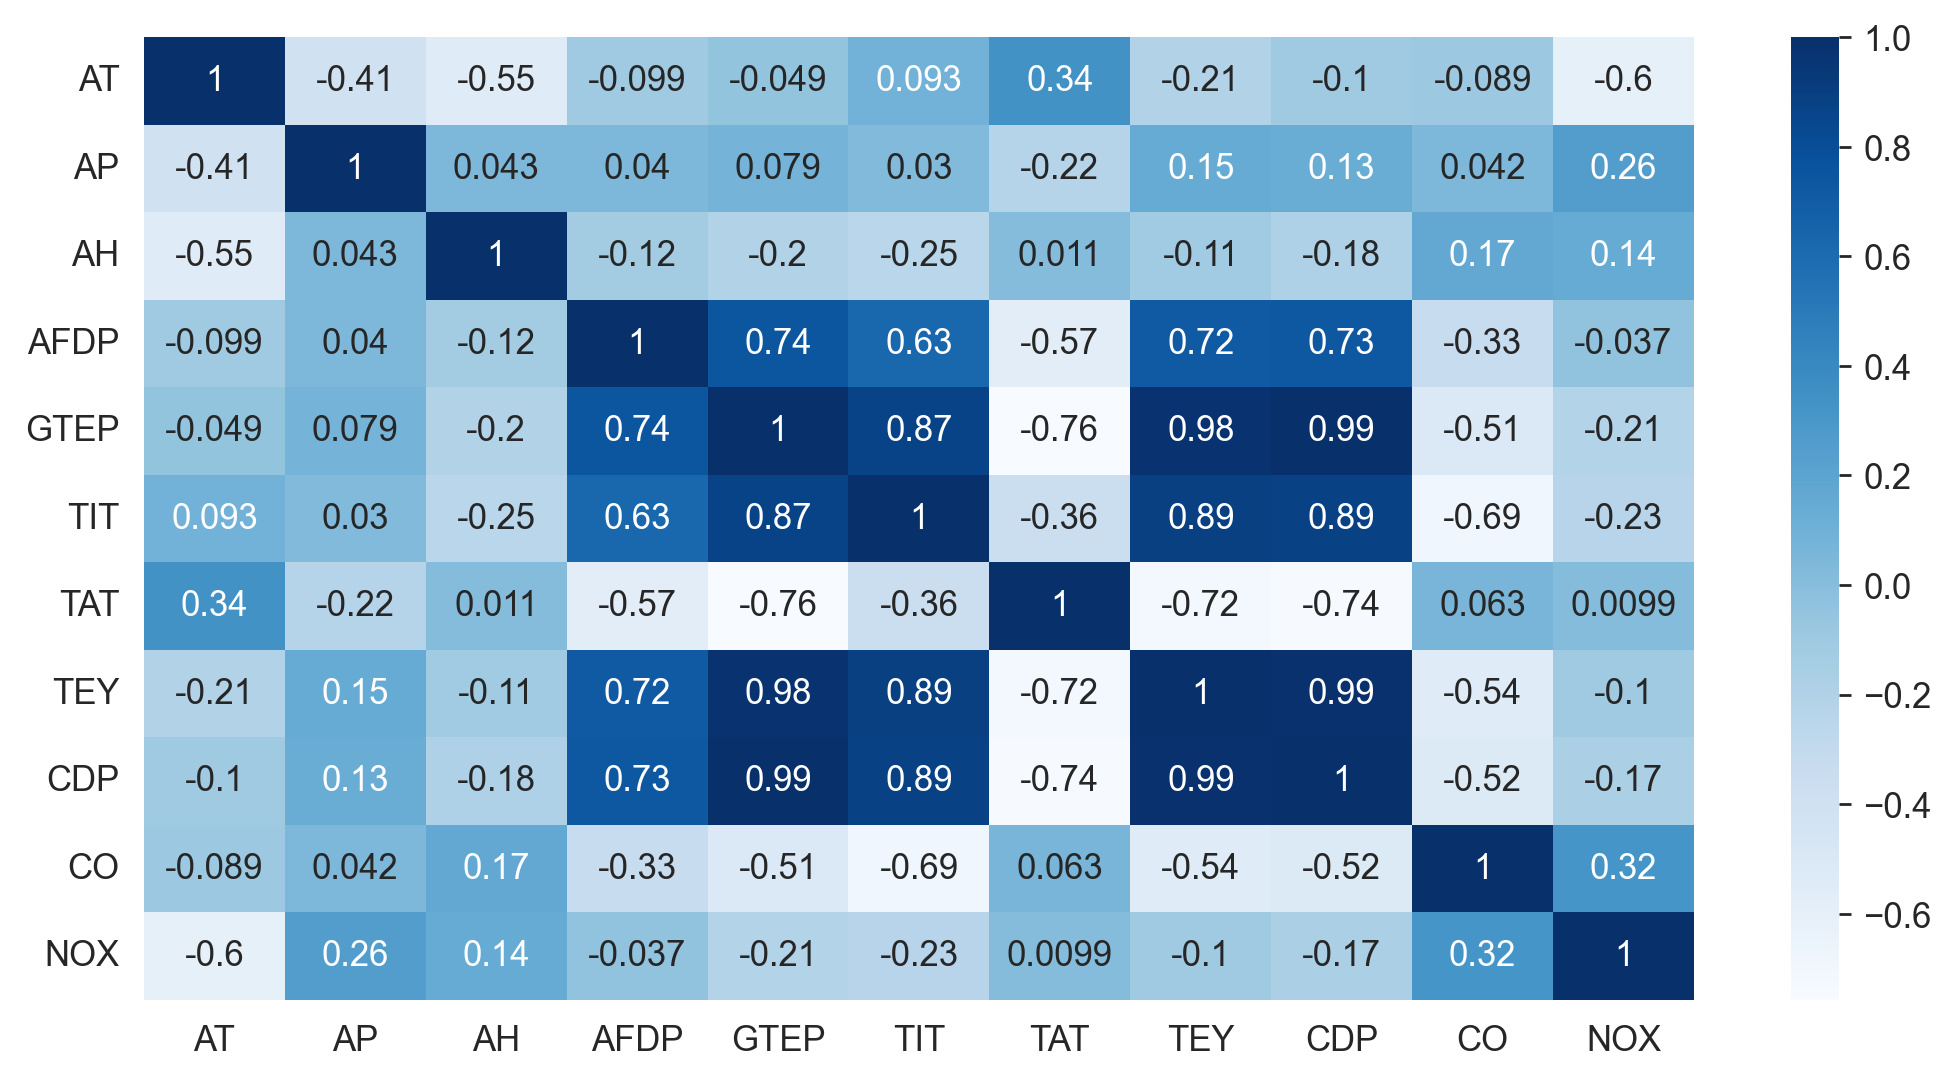

In [11]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [12]:
#Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [13]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [14]:
x = data.drop('TEY', axis=1)
y = data['TEY']

In [15]:
#Standardization

sc = StandardScaler()

x = sc.fit_transform(x)

###### Model Building

In [16]:
model = Sequential()

model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(units=1, activation='linear'))

adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='mse')

model.fit(x,y, validation_data=(x,y), batch_size=40, epochs=50)

Epoch 1/50
376/376 [==============================] - 2s 4ms/step - loss: 3579.1350 - val_loss: 280.9701
Epoch 2/50
376/376 [==============================] - 2s 4ms/step - loss: 1904.6793 - val_loss: 159.4441
Epoch 3/50
376/376 [==============================] - 1s 3ms/step - loss: 1689.5325 - val_loss: 217.7080
Epoch 4/50
376/376 [==============================] - 1s 4ms/step - loss: 1530.8446 - val_loss: 276.3788
Epoch 5/50
376/376 [==============================] - 1s 3ms/step - loss: 1381.6018 - val_loss: 156.2333
Epoch 6/50
376/376 [==============================] - 1s 4ms/step - loss: 1268.3344 - val_loss: 84.0799
Epoch 7/50
376/376 [==============================] - 1s 4ms/step - loss: 1178.4296 - val_loss: 69.5192
Epoch 8/50
376/376 [==============================] - 1s 4ms/step - loss: 1115.6824 - val_loss: 42.8615
Epoch 9/50
376/376 [==============================] - 2s 4ms/step - loss: 1091.1613 - val_loss: 114.8130
Epoch 10/50
376/376 [==============================] - 2s 

In [17]:
ypred = model.predict(x)
print('Accuracy = ', r2_score(y,ypred))

470/470 [==============================] - 1s 2ms/step
Accuracy =  0.9373758068926771


###### Hyperparameter Tuning

- Tuning Batch Size and epochs

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units=1, kernel_initializer = 'uniform', activation = 'linear'))
    
    adam=Adam(learning_rate = 0.01)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics=['mse'])
    return model

In [34]:
# Using GridSearchCV.

model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
param_grids = {
    'batch_size' : [20,40],
    'epochs' : [50,100]
}

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 2ms/step
[CV 1/5; 1/4] END .batch_size=20, epochs=50;, score=-1600.483 total time= 1.0min
[CV 2/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 2ms/step
[CV 2/5; 1/4] END ..batch_size=20, epochs=50;, score=-976.073 total time= 1.4min
[CV 3/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 1ms/step
[CV 3/5; 1/4] END .batch_size=20, epochs=50;, score=-1743.610 total time= 1.1min
[CV 4/5; 1/4] START batch_size=20, epochs=50....................................
94/94 [==============================] - 0s 2ms/step
[CV 4/5; 1/4] END .batch_size=20, epochs=50;, score=-1450.393 total time= 1.0min
[CV 5/5; 1/4] START batch_size=20, epochs=50....................................

In [35]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -1380.7011358663653, using {'batch_size': 20, 'epochs': 50}
-1380.7011358663653,286.34612458753105 with: {'batch_size': 20, 'epochs': 50}
-1380.7011358663653,286.34612458753105 with: {'batch_size': 20, 'epochs': 100}
-1380.7011358663653,286.34612458753105 with: {'batch_size': 40, 'epochs': 50}
-1380.7011358663653,286.34612458753105 with: {'batch_size': 40, 'epochs': 100}


- Tuning Learning rate and Dropout rate

In [ ]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(units=12, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=8, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1,activation = 'linear'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics = [])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0, batch_size = 20, epochs = 50)

# Define the grid search parameters

param_grids = {
    'learning_rate' : [0.01,0.1],
    'dropout_rate' : [0.1,0.2]
}

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 2ms/step
[CV 1/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1600.483 total time= 1.2min
[CV 2/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 2ms/step
[CV 2/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-976.073 total time= 1.2min
[CV 3/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 2ms/step
[CV 3/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1743.610 total time= 1.2min
[CV 4/5; 1/4] START dropout_rate=0.1, learning_rate=0.01........................
94/94 [==============================] - 0s 2ms/step
[CV 4/5; 1/4] END dropout_rate=0.1, learning_rate=0.01;, score=-1450.393 total time= 1.1min
[CV 5/5; 1/4] START dropout_rate=0.1,

In [ ]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
#ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=5, activation='relu'))

ann.add(Dense(units=1))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=150)

In [ ]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

In [ ]:
ypred = ann.predict(xtest)

In [ ]:
print(r2_score(ytest,ypred))

- Early Stopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', patience=20)

In [ ]:
ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=5, activation='relu'))

ann.add(Dense(units=1))

ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early_stop], epochs=150)

In [ ]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

In [ ]:
ypred = ann.predict(xtest)
ypred

In [ ]:
print(r2_score(ytest,ypred))

- Dropout Layer

In [ ]:
ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dropout(rate=0.3))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dropout(rate=0.3))

ann.add(Dense(units=1))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=100)

In [ ]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

In [ ]:
ypred = ann.predict(xtest)
ypred

In [ ]:
print(r2_score(ytest,ypred))

- Early Stopping + Dropout Layer

In [ ]:
ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dropout(rate=0.3))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dropout(rate=0.3))

ann.add(Dense(units=1))

ann.compile(optimizer='adam', loss='mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early_stop], epochs=100)

In [ ]:
early_drop_loss = pd.DataFrame(ann.history.history)

early_drop_loss.plot()

In [ ]:
ypred = ann.predict(xtest)
ypred

In [ ]:
print(r2_score(ytest,ypred))